# Data Pre-processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Reading dataset
train_store = pd.read_csv('../data/train_store.csv', na_values=['?', None])
test_store = pd.read_csv('../data/test_store.csv', na_values=['?', None])


In [4]:
# Checking dataset brief (train)
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,Not Available,Not Available,Not Available
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,Not Available,Not Available,Not Available
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,Not Available,Not Available,Not Available


In [5]:
# Checking dataset brief (test)
test_store.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,Not Available,Not Available,Not Available
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,Not Available,Not Available,Not Available
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,Not Available,Not Available,Not Available
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,Not Available,Not Available,Not Available


In [6]:
# Checking dataset brief (train)
train_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990515 entries, 0 to 990514
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      990515 non-null  int64  
 1   DayOfWeek                  990515 non-null  int64  
 2   Date                       990515 non-null  object 
 3   Sales                      990515 non-null  int64  
 4   Customers                  990515 non-null  int64  
 5   Open                       990515 non-null  int64  
 6   Promo                      990515 non-null  int64  
 7   StateHoliday               990515 non-null  object 
 8   SchoolHoliday              990515 non-null  int64  
 9   StoreType                  990515 non-null  object 
 10  Assortment                 990515 non-null  object 
 11  CompetitionDistance        990515 non-null  float64
 12  CompetitionOpenSinceMonth  990515 non-null  object 
 13  CompetitionOpenSinceYear   99

In [7]:
# Checking dataset brief (test)
test_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41088 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        41088 non-null  float64
 11  CompetitionOpenSinceMonth  41088 non-null  object 
 12  CompetitionOpenSinceYear   41088 non-null  object 
 13  Promo2                     41088 non-null  int

### Non-numeric to numeric

In [8]:
# Checking non-numeric columns (train)
train_store.applymap(np.isreal)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,True,True,False,True,True,True,True,True,True,False,False,True,False,False,True,False,False,False
1,True,True,False,True,True,True,True,True,True,False,False,True,False,False,True,False,False,False
2,True,True,False,True,True,True,True,True,True,False,False,True,False,False,True,False,False,False
3,True,True,False,True,True,True,True,True,True,False,False,True,False,False,True,False,False,False
4,True,True,False,True,True,True,True,True,True,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990510,True,True,False,True,True,True,True,False,True,False,False,True,False,False,True,False,False,False
990511,True,True,False,True,True,True,True,False,True,False,False,True,False,False,True,False,False,False
990512,True,True,False,True,True,True,True,False,True,False,False,True,False,False,True,False,False,False
990513,True,True,False,True,True,True,True,False,True,False,False,True,False,False,True,False,False,False


In [9]:
# Checking non-numeric columns (test)
test_store.applymap(np.isreal)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,True,True,True,False,True,True,False,True,False,False,True,False,False,True,False,False,False
1,True,True,True,False,True,True,False,True,False,False,True,False,False,True,False,False,False
2,True,True,True,False,True,True,False,True,False,False,True,False,False,True,False,False,False
3,True,True,True,False,True,True,False,True,False,False,True,False,False,True,False,False,False
4,True,True,True,False,True,True,False,True,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,True,True,True,False,True,True,True,True,False,False,True,False,False,True,False,False,False
41084,True,True,True,False,True,True,True,True,False,False,True,False,False,True,False,False,False
41085,True,True,True,False,True,True,True,True,False,False,True,False,False,True,False,False,False
41086,True,True,True,False,True,True,True,True,False,False,True,False,False,True,False,False,False


##### Now that we ave determined that both datasets have non-numeric columns, we will do a conversion on both.

In [10]:
# Converting StateHoliday column into float (train)
train_store['StateHoliday'] = pd.to_numeric(train_store['StateHoliday'], errors='coerce')

# Converting StateHoliday column into float (test)
test_store['StateHoliday'] = pd.to_numeric(test_store['StateHoliday'], errors='coerce')

In [11]:
# Converting non-numeric columns to numeric (train)
enc = LabelEncoder()
enc.fit(train_store['Date'])
train_store['Date'] = enc.transform(train_store['Date'])

enc = LabelEncoder()
enc.fit(train_store['CompetitionDistance'])
train_store['CompetitionDistance'] = enc.transform(train_store['CompetitionDistance'])

enc = LabelEncoder()
enc.fit(train_store['StoreType'])
train_store['StoreType'] = enc.transform(train_store['StoreType'])

enc = LabelEncoder()
enc.fit(train_store['Assortment'])
train_store['Assortment'] = enc.transform(train_store['Assortment'])

enc = LabelEncoder()
enc.fit(train_store['CompetitionOpenSinceMonth'])
train_store['CompetitionOpenSinceMonth'] = enc.transform(train_store['CompetitionOpenSinceMonth'])

enc = LabelEncoder()
enc.fit(train_store['CompetitionOpenSinceYear'])
train_store['CompetitionOpenSinceYear'] = enc.transform(train_store['CompetitionOpenSinceYear'])

enc = LabelEncoder()
enc.fit(train_store['Promo2SinceWeek'])
train_store['Promo2SinceWeek'] = enc.transform(train_store['Promo2SinceWeek'])

enc = LabelEncoder()
enc.fit(train_store['Promo2SinceYear'])
train_store['Promo2SinceYear'] = enc.transform(train_store['Promo2SinceYear'])

enc = LabelEncoder()
enc.fit(train_store['PromoInterval'])
train_store['PromoInterval'] = enc.transform(train_store['PromoInterval'])

enc = LabelEncoder()
enc.fit(train_store['StateHoliday'])
train_store['StateHoliday'] = enc.transform(train_store['StateHoliday'])

In [12]:
# Confirming all numeric columns (train)
train_store.applymap(np.isreal)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990510,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
990511,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
990512,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
990513,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [13]:
# Converting non-numeric columns to numeric (test)
enc = LabelEncoder()
enc.fit(test_store['Date'])
test_store['Date'] = enc.transform(test_store['Date'])

enc = LabelEncoder()
enc.fit(test_store['Open'])
test_store['Open'] = enc.transform(test_store['Open'])

enc = LabelEncoder()
enc.fit(test_store['StateHoliday'])
test_store['StateHoliday'] = enc.transform(test_store['StateHoliday'])

enc = LabelEncoder()
enc.fit(test_store['StoreType'])
test_store['StoreType'] = enc.transform(test_store['StoreType'])

enc = LabelEncoder()
enc.fit(test_store['Assortment'])
test_store['Assortment'] = enc.transform(test_store['Assortment'])

enc = LabelEncoder()
enc.fit(test_store['CompetitionDistance'])
test_store['CompetitionDistance'] = enc.transform(test_store['CompetitionDistance'])

enc = LabelEncoder()
enc.fit(test_store['CompetitionOpenSinceMonth'])
test_store['CompetitionOpenSinceMonth'] = enc.transform(test_store['CompetitionOpenSinceMonth'])

enc = LabelEncoder()
enc.fit(test_store['CompetitionOpenSinceYear'])
test_store['CompetitionOpenSinceYear'] = enc.transform(test_store['CompetitionOpenSinceYear'])

enc = LabelEncoder()
enc.fit(test_store['Promo2SinceWeek'])
test_store['Promo2SinceWeek'] = enc.transform(test_store['Promo2SinceWeek'])

enc = LabelEncoder()
enc.fit(test_store['Promo2SinceYear'])
test_store['Promo2SinceYear'] = enc.transform(test_store['Promo2SinceYear'])

enc = LabelEncoder()
enc.fit(test_store['PromoInterval'])
test_store['PromoInterval'] = enc.transform(test_store['PromoInterval'])

In [14]:
# Checking non-numeric columns (test)
test_store.applymap(np.isreal)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
41084,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
41085,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
41086,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


### Handling NaN values

In [15]:
# Checking for NaN values (train)
train_store.isnull().values.any()

False

In [16]:
# Checking for NaN values (test)
test_store.isnull().values.any()

False

##### There are no NaN values in both datasets

### Feature Engineering

In [17]:
# Generating new features from Date

train_store.sort_values(["Store","Date"], ignore_index=True, inplace=True)
test_store.sort_values(["Store","Date"], ignore_index=True, inplace=True)

for dataset in (train_store,test_store):
    dataset['Date'] = pd.to_datetime(dataset['Date'])
    dataset['Day'] = dataset.Date.dt.day
    dataset['Month'] = dataset.Date.dt.month
    dataset['Year'] = dataset.Date.dt.year
    dataset['DayOfYear'] = dataset.Date.dt.dayofyear
    dataset['WeekOfYear'] = dataset.Date.dt.weekofyear
    dataset.set_index('Date', inplace=True)

In [18]:
train_store.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,DayOfYear,WeekOfYear
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000000000,1,2,0,0,0,0,1,1,2,0,...,15,0,24,7,3,1,1,1970,1,1
1970-01-01 00:00:00.000000001,1,3,5530,668,1,0,0,1,2,0,...,15,0,24,7,3,1,1,1970,1,1
1970-01-01 00:00:00.000000002,1,4,4327,578,1,0,0,1,2,0,...,15,0,24,7,3,1,1,1970,1,1
1970-01-01 00:00:00.000000003,1,5,4486,619,1,0,0,1,2,0,...,15,0,24,7,3,1,1,1970,1,1
1970-01-01 00:00:00.000000004,1,6,4997,635,1,0,0,1,2,0,...,15,0,24,7,3,1,1,1970,1,1


In [19]:
test_store.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,DayOfYear,WeekOfYear
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000000000,40233,1,6,1,0,0,1,2,0,112,...,15,0,21,7,3,1,1,1970,1,1
1970-01-01 00:00:00.000000001,39377,1,7,0,0,0,1,2,0,112,...,15,0,21,7,3,1,1,1970,1,1
1970-01-01 00:00:00.000000002,38521,1,1,1,1,0,1,2,0,112,...,15,0,21,7,3,1,1,1970,1,1
1970-01-01 00:00:00.000000003,37665,1,2,1,1,0,1,2,0,112,...,15,0,21,7,3,1,1,1970,1,1
1970-01-01 00:00:00.000000004,36809,1,3,1,1,0,1,2,0,112,...,15,0,21,7,3,1,1,1970,1,1


### Datetime Columns

In [20]:
# Naming days of the week (train)
train_store['day'] = train_store['DayOfWeek'].apply(lambda x: pd.to_datetime(x, format ="%Y-%m-%d").day_name())
train_store.sort_values(by='DayOfWeek').head(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,DayOfYear,WeekOfYear,day
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000000643,553,1,7651,628,1,1,0,0,2,0,...,1,2,1,1,1,1,1970,1,1,Thursday
1970-01-01 00:00:00.000000146,367,1,7892,728,1,1,0,0,3,2,...,0,24,7,3,1,1,1970,1,1,Thursday
1970-01-01 00:00:00.000000902,743,1,3152,400,1,0,0,0,0,0,...,1,3,3,1,1,1,1970,1,1,Thursday
1970-01-01 00:00:00.000000370,142,1,6841,709,1,1,0,1,0,0,...,0,24,7,3,1,1,1970,1,1,Thursday
1970-01-01 00:00:00.000000139,367,1,0,0,0,0,1,0,3,2,...,0,24,7,3,1,1,1970,1,1,Thursday
1970-01-01 00:00:00.000000335,971,1,13666,1395,1,1,0,0,2,0,...,1,3,3,2,1,1,1970,1,1,Thursday
1970-01-01 00:00:00.000000909,743,1,6937,613,1,1,0,0,0,0,...,1,3,3,1,1,1,1970,1,1,Thursday
1970-01-01 00:00:00.000000377,142,1,4066,544,1,0,0,0,0,0,...,0,24,7,3,1,1,1970,1,1,Thursday
1970-01-01 00:00:00.000000342,971,1,7328,889,1,0,0,0,2,0,...,1,3,3,2,1,1,1970,1,1,Thursday


In [21]:
# Days of the week
train_store['day'].value_counts()

Thursday    990515
Name: day, dtype: int64

In [22]:
# Naming days of the week (test)
test_store['day'] = test_store['DayOfWeek'].apply(lambda x: pd.to_datetime(x, format ="%Y-%m-%d").day_name())
test_store.sort_values(by='DayOfWeek').head(10)

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,DayOfYear,WeekOfYear,day
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000000037,8996,564,1,1,0,0,0,3,2,359,...,1,3,4,1,1,1,1970,1,1,Thursday
1970-01-01 00:00:00.000000030,14743,248,1,1,1,0,0,0,2,33,...,1,14,3,1,1,1,1970,1,1,Thursday
1970-01-01 00:00:00.000000009,33201,872,1,1,0,0,1,0,2,268,...,1,6,6,2,1,1,1970,1,1,Thursday
1970-01-01 00:00:00.000000023,20735,248,1,1,0,0,1,0,2,33,...,1,14,3,1,1,1,1970,1,1,Thursday
1970-01-01 00:00:00.000000016,27209,872,1,1,1,0,0,0,2,268,...,1,6,6,2,1,1,1970,1,1,Thursday
1970-01-01 00:00:00.000000016,26727,248,1,1,1,0,1,0,2,33,...,1,14,3,1,1,1,1970,1,1,Thursday
1970-01-01 00:00:00.000000030,15014,593,1,1,1,0,0,0,2,546,...,0,21,7,3,1,1,1970,1,1,Thursday
1970-01-01 00:00:00.000000023,21217,872,1,1,0,0,0,0,2,268,...,1,6,6,2,1,1,1970,1,1,Thursday
1970-01-01 00:00:00.000000009,32719,248,1,1,0,0,1,0,2,33,...,1,14,3,1,1,1,1970,1,1,Thursday


In [23]:
# Days of the week (test)
test_store['day'].value_counts()

Thursday    41088
Name: day, dtype: int64

### Scaling

In [24]:
# Train
minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
train_store = pd.DataFrame(np.random.exponential(200, size=2000))

train_store.sample(5)

,0
1431,61.311597
850,84.219783
1072,201.184268
264,120.084963
949,50.477696


In [25]:
train_store[0].min(), train_store[0].max()

(0.27657628787401733, 2070.0071923234773)

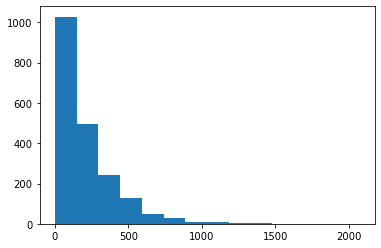

In [26]:
count, bins, ignored = plt.hist(train_store, 14)
plt.show()

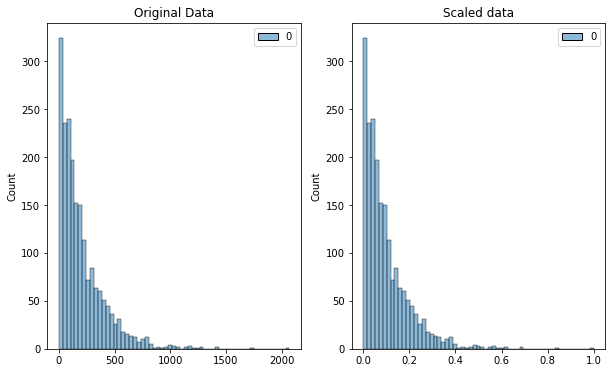

In [27]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(train_store, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(train_store)

In [28]:
# test dataset
minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
test_store = pd.DataFrame(np.random.exponential(200, size=2000))

test_store.sample(5)

,0
824,58.543796
577,72.733857
1612,202.284135
1706,552.506612
1241,99.402521


In [29]:
test_store[0].min(), test_store[0].max()

(0.1408982540855007, 1483.8540646545675)

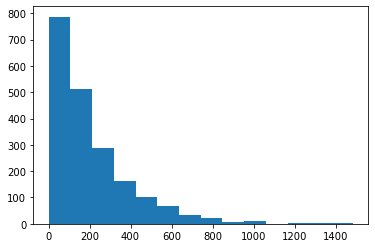

In [30]:
count, bins, ignored = plt.hist(test_store, 14)
plt.show()

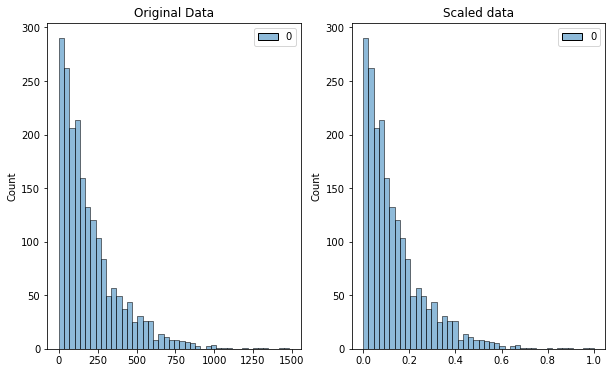

In [31]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(test_store, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(test_store)

In [32]:
train_store.head()

,0
0,11.210994
1,223.549847
2,175.510573
3,23.626259
4,365.790138
